<a href="https://colab.research.google.com/github/Soulpurr/customer_churn_ml/blob/main/consumer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [ ]:
df=pd.read_csv("./drive/MyDrive/Customer_Churn/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data Exploration(EDA)**

In [ ]:
#Dropping customerId as it is of no use
df.drop("customerID",axis='columns',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Converting TotalCharges to float from an object


In [ ]:
#We noticed that totalcharges is obj whereas monthly charges is float
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
#this will leave error rows and convert remaining rows

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
df=df[df.TotalCharges!=' '];


In [ ]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)
df.dtypes

<ipython-input-8-cd19826b4433>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges=pd.to_numeric(df.TotalCharges)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df[df['Churn']=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

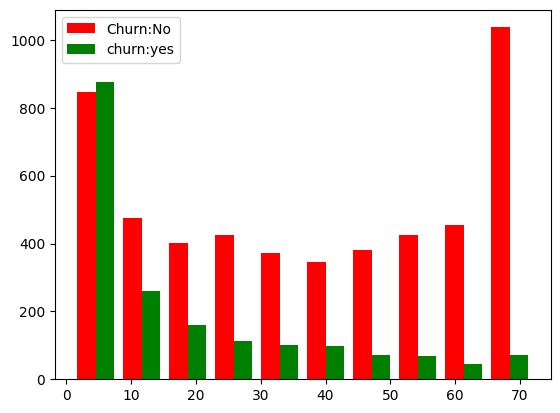

In [ ]:
plt.hist([df[df['Churn']=='No'].tenure,df[df['Churn']=='Yes'].tenure],color=['red','green'],label=['Churn:No','churn:yes'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
  for columns in df:
    if(df[columns].dtypes=='object'):
      print(f"{columns}:{df[columns].unique()}")

In [ ]:
print_unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [ ]:
print_unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


**Now we need to convert every text to number **

In [ ]:
yes_no_cols=[ 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_cols:
  df[col].replace({'Yes':1,'No':0},inplace=True);

#we dont need hotencoding as there are only 2 categories

In [ ]:
df['gender'].replace({'Female':1,'Male':0},inplace=True);

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
#Doing hot encoding for ex in contract we have 3 unique values month to month,one year,two year so for one custormer either one of this will be 1 rest will be 0
#So we are using dummies it will create theses uniques values as seperate col or we can use oneHotEncoder too.
df2=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.shape

(7032, 27)

In [ ]:
df2.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

Scaling The data

In [ ]:
cols_to_scale=['TotalCharges','tenure','MonthlyCharges']
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2['TotalCharges']

0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7038    0.227521
7039    0.847461
7040    0.037809
7041    0.033210
7042    0.787641
Name: TotalCharges, Length: 7032, dtype: float64

Modelling


In [ ]:
#Dividing Data
x=df2.drop('Churn',axis='columns')
y=df2['Churn']
y


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
#train-test-split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
#Creating a artificial neural network(ANN)
import numpy as np
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds


In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 3s 6ms/step - loss: 0.5262 - accuracy: 0.7244
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4270 - accuracy: 0.7904
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4188 - accuracy: 0.7982
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4134 - accuracy: 0.8014
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4103 - accuracy: 0.8053
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4093 - accuracy: 0.8055
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4065 - accuracy: 0.8084
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4046 - accuracy: 0.8089
Epoch 9/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4030 - accuracy: 0.8119
Epoch 10/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4016 - accura

#Handling Imbalanced Data

# Under Sampling - Reducing Majority data

In [ ]:
# Class count
count_class_0, count_class_1 = df.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [ ]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [ ]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 5ms/step - loss: 0.6698 - accuracy: 0.6023
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5565 - accuracy: 0.7418
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7552
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.7585
Epoch 5/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4930 - accuracy: 0.7605
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4866 - accuracy: 0.7642
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.7666
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.7679
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4794 - accuracy: 0.7686
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7679
Epoch 11/

#OverSampling:Duplicating  Minority Data


In [ ]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [ ]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 6ms/step - loss: 0.5489 - accuracy: 0.7230
Epoch 2/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4871 - accuracy: 0.7623
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4783 - accuracy: 0.7674
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4720 - accuracy: 0.7673
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4686 - accuracy: 0.7703
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4651 - accuracy: 0.7738
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4617 - accuracy: 0.7729
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4592 - accuracy: 0.7775
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4559 - accuracy: 0.7798
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4548 - accura

# Oversampling using Smote

In [ ]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 5s 7ms/step - loss: 0.5307 - accuracy: 0.7392
Epoch 2/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4707 - accuracy: 0.7785
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4594 - accuracy: 0.7827
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4531 - accuracy: 0.7868
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4487 - accuracy: 0.7864
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4447 - accuracy: 0.7924
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4409 - accuracy: 0.7952
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4363 - accuracy: 0.7954
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4329 - accuracy: 0.7975
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4296 - accura